In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# impor
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Sets/new_train (3).csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Figure size 2000x500 with 0 Axes>

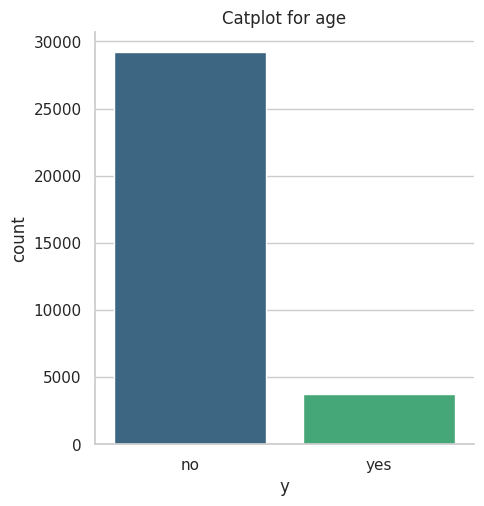

<Figure size 2000x500 with 0 Axes>

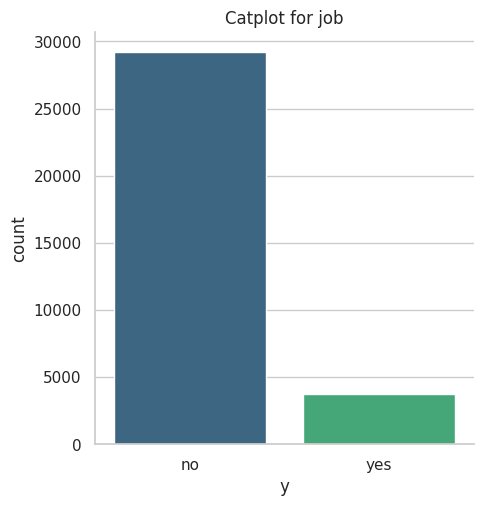

<Figure size 2000x500 with 0 Axes>

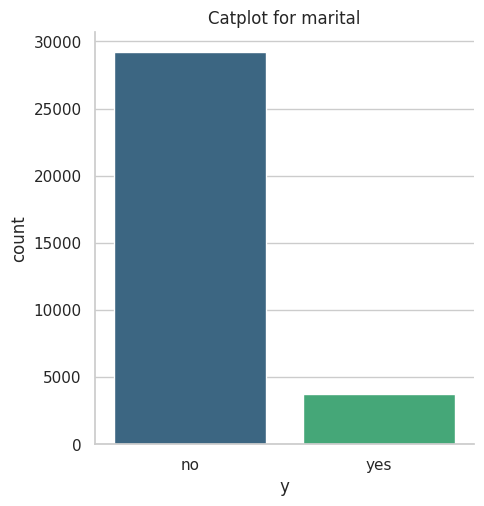

<Figure size 2000x500 with 0 Axes>

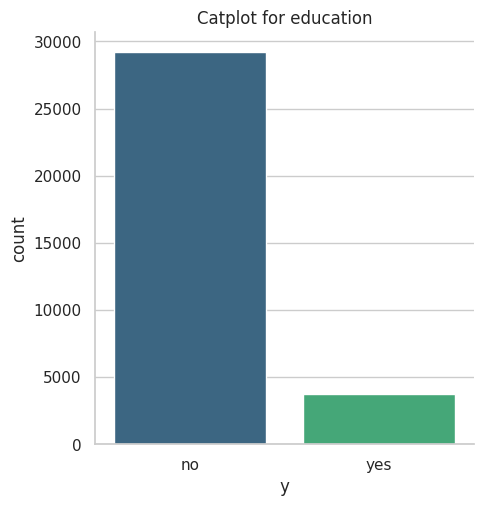

<Figure size 2000x500 with 0 Axes>

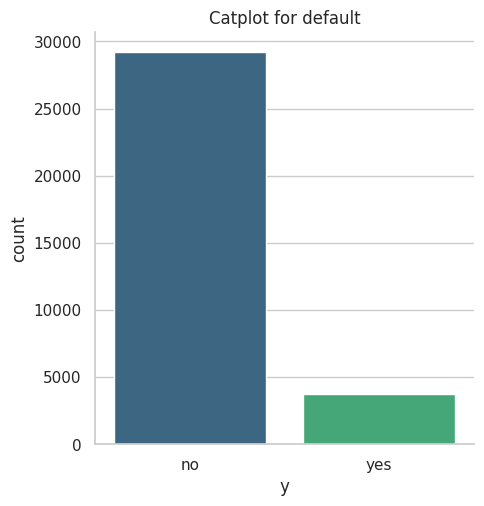

<Figure size 2000x500 with 0 Axes>

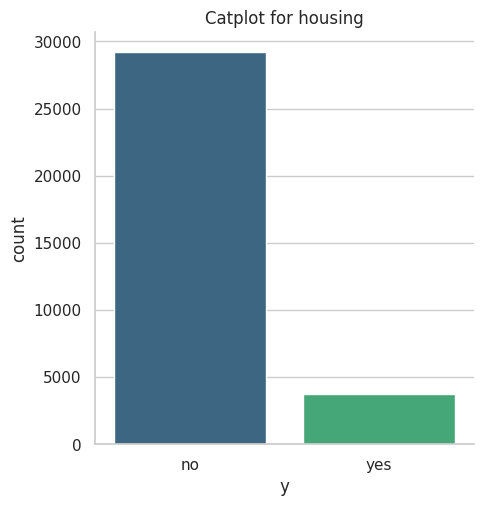

<Figure size 2000x500 with 0 Axes>

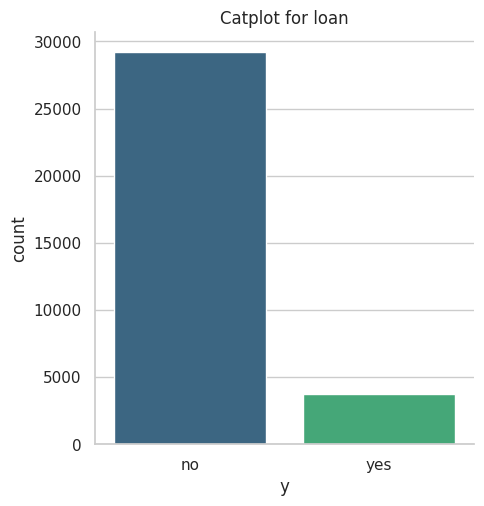

<Figure size 2000x500 with 0 Axes>

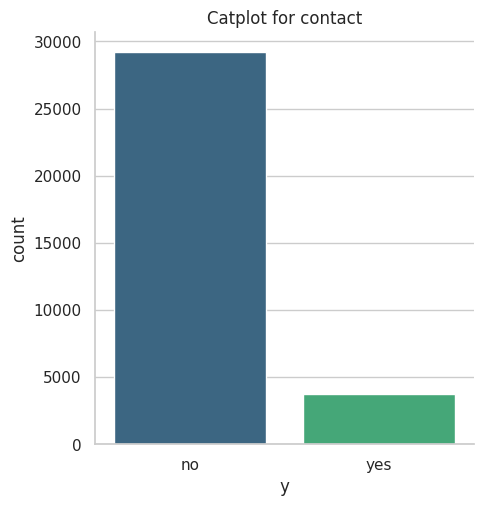

<Figure size 2000x500 with 0 Axes>

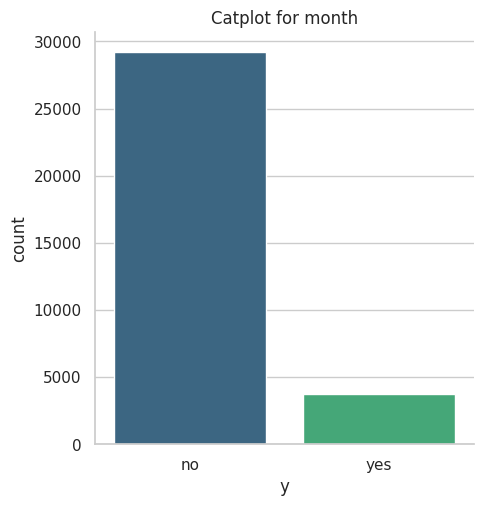

<Figure size 2000x500 with 0 Axes>

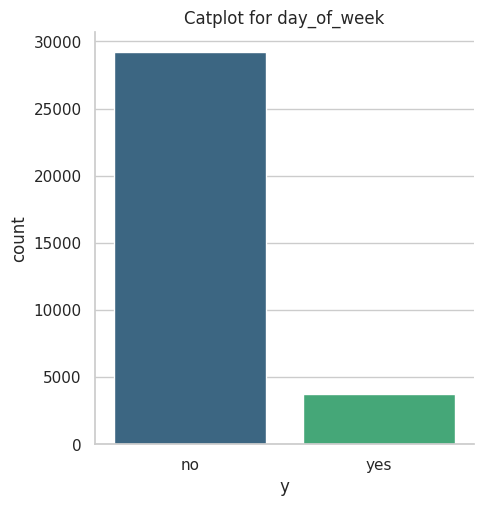

<Figure size 2000x500 with 0 Axes>

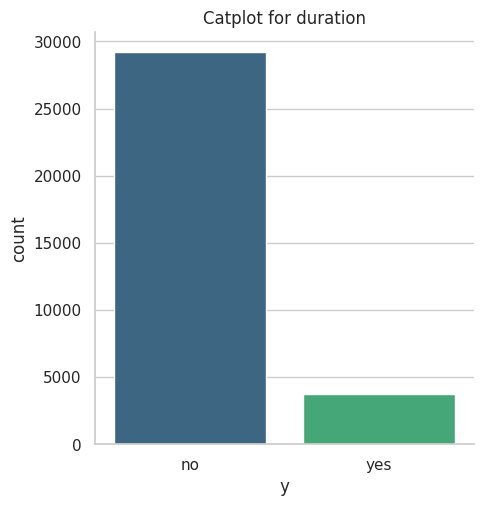

<Figure size 2000x500 with 0 Axes>

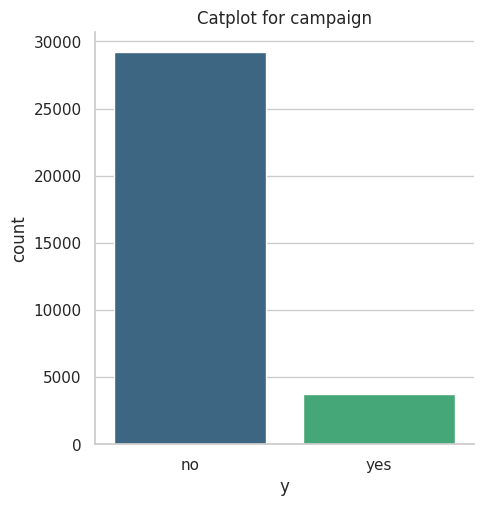

<Figure size 2000x500 with 0 Axes>

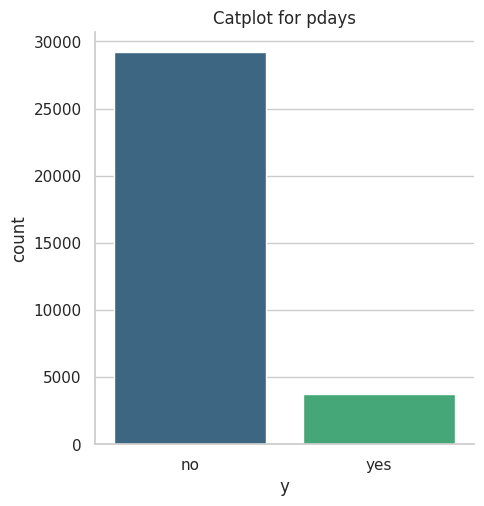

<Figure size 2000x500 with 0 Axes>

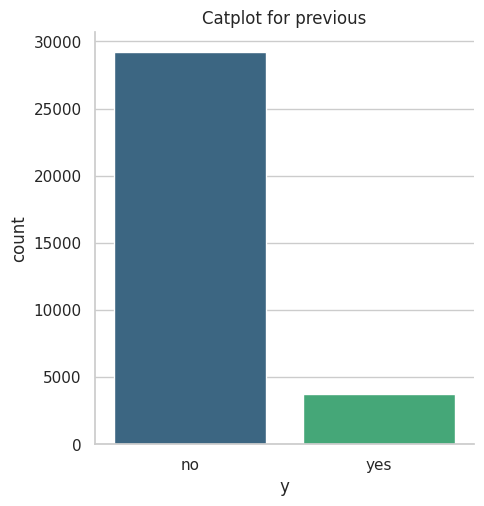

<Figure size 2000x500 with 0 Axes>

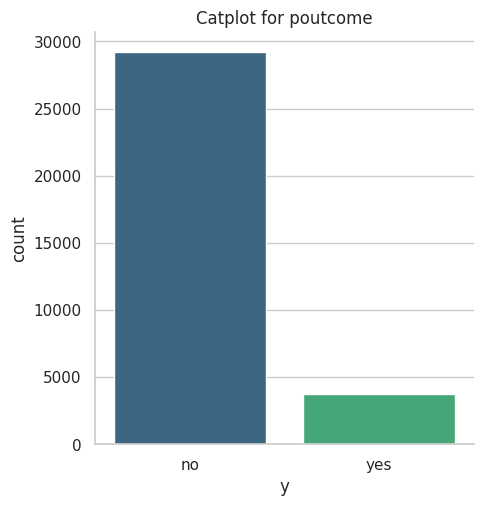

<Figure size 2000x500 with 0 Axes>

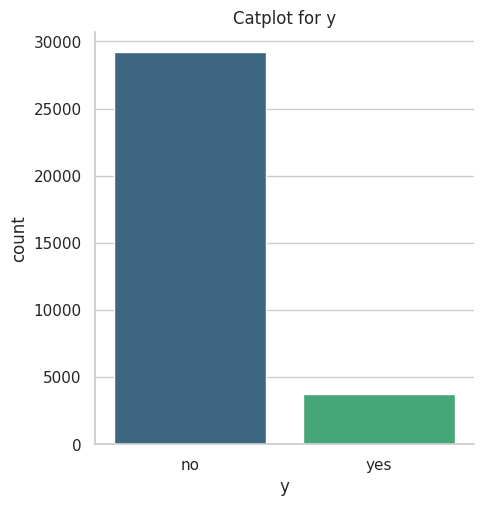

In [ ]:
columns_to_plot = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'y']

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Loop through columns and create catplots
for column in columns_to_plot:
    plt.figure(figsize=(20,5))  # Adjust the figure size as needed
    sns.catplot(x='y', kind="count", data=df, palette="viridis")
    plt.title(f'Catplot for {column}')
    plt.show()

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

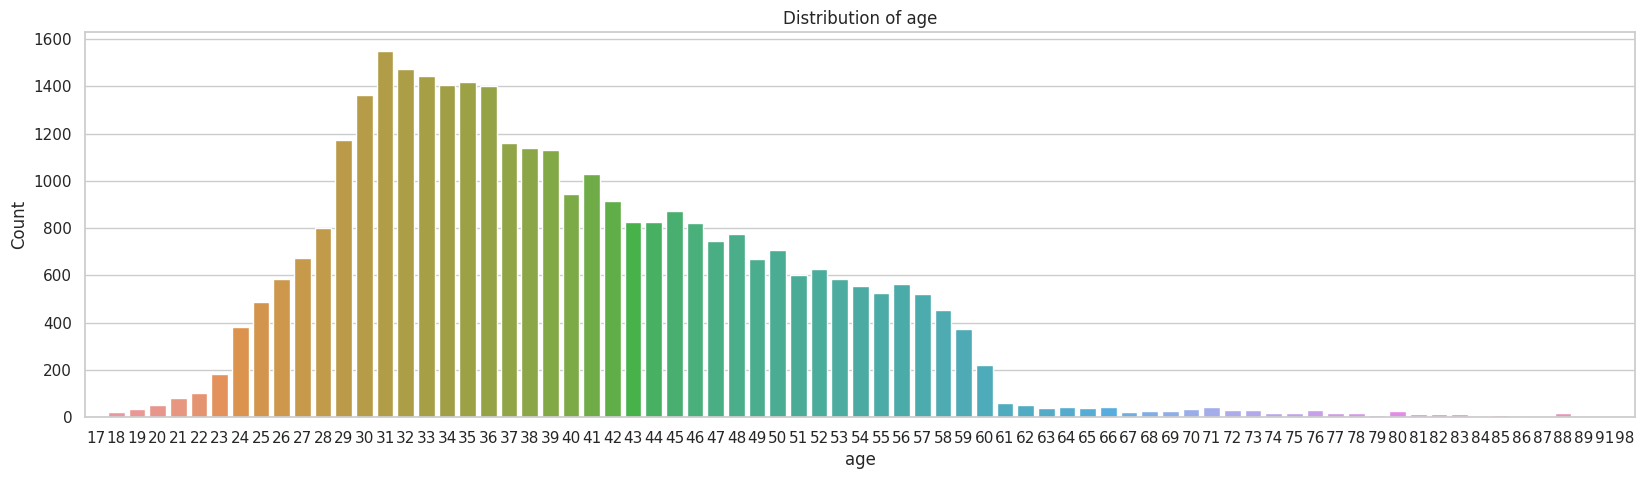

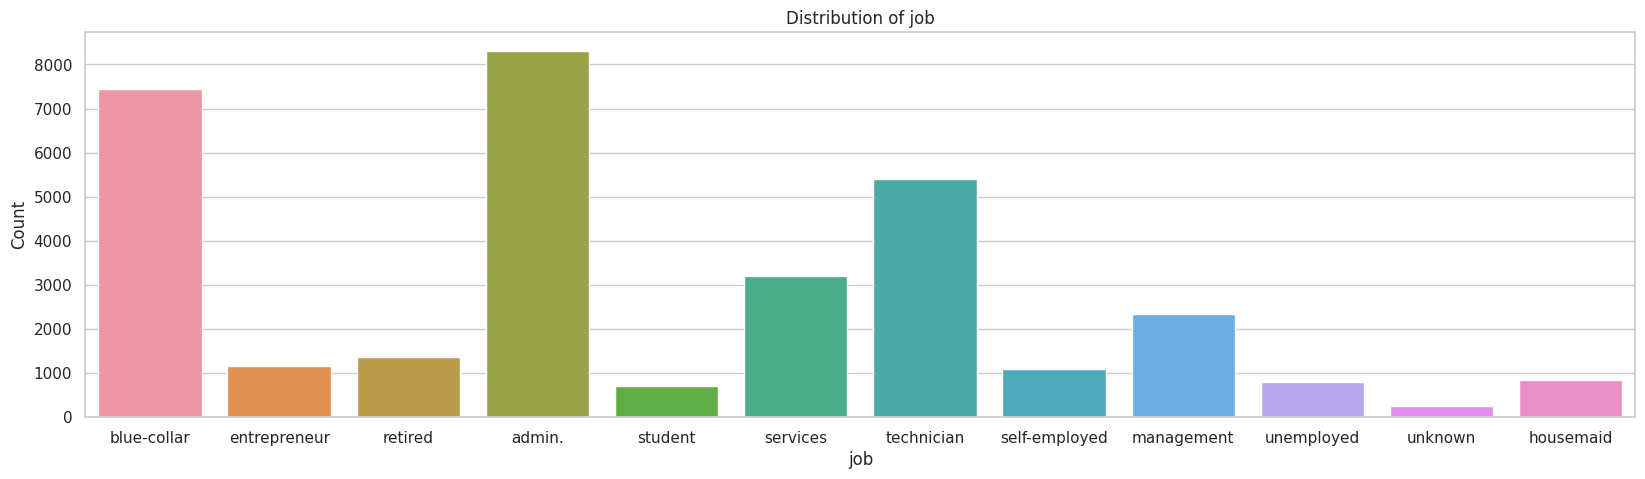

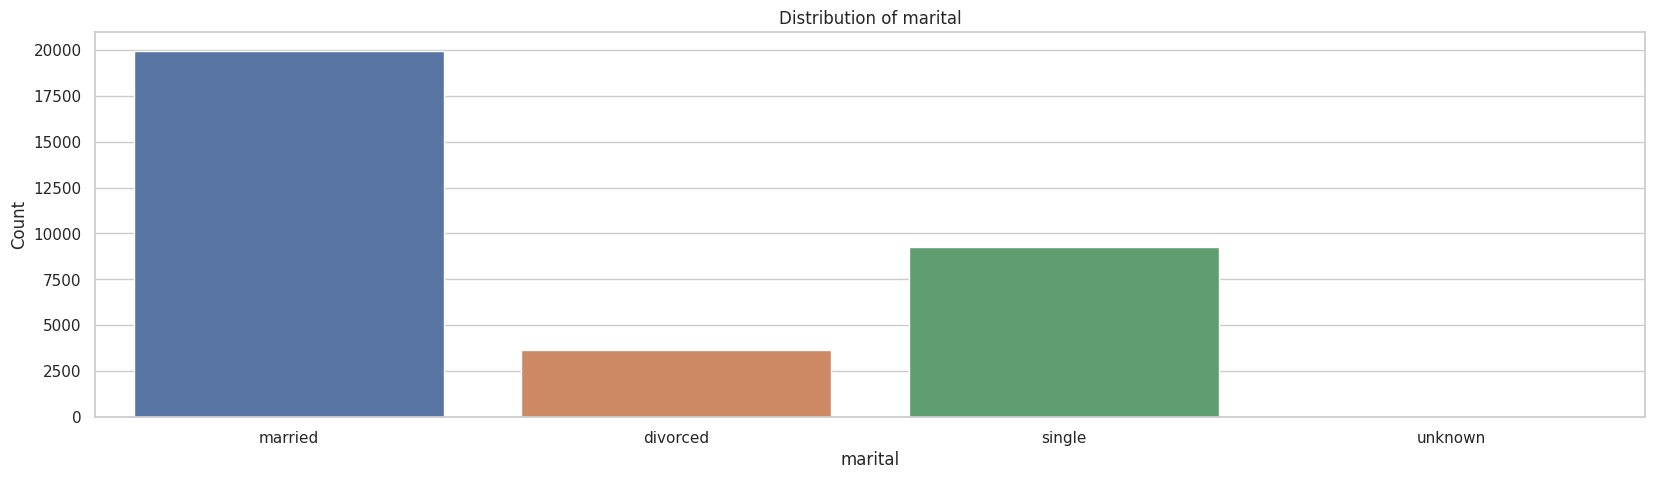

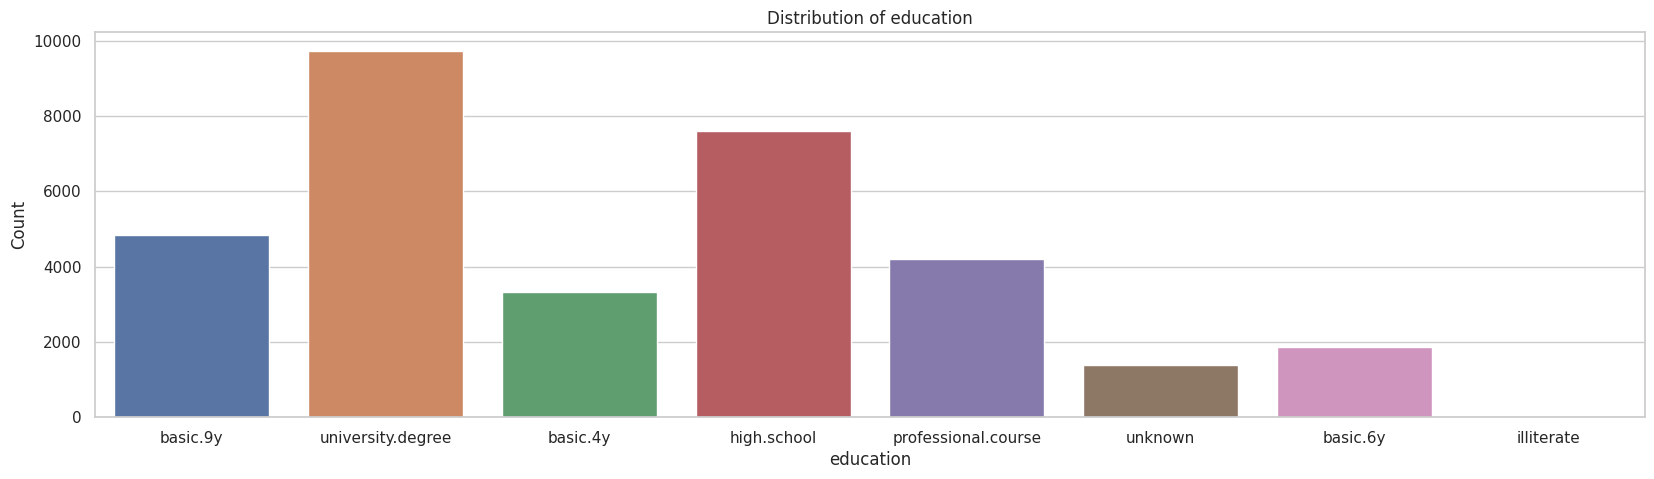

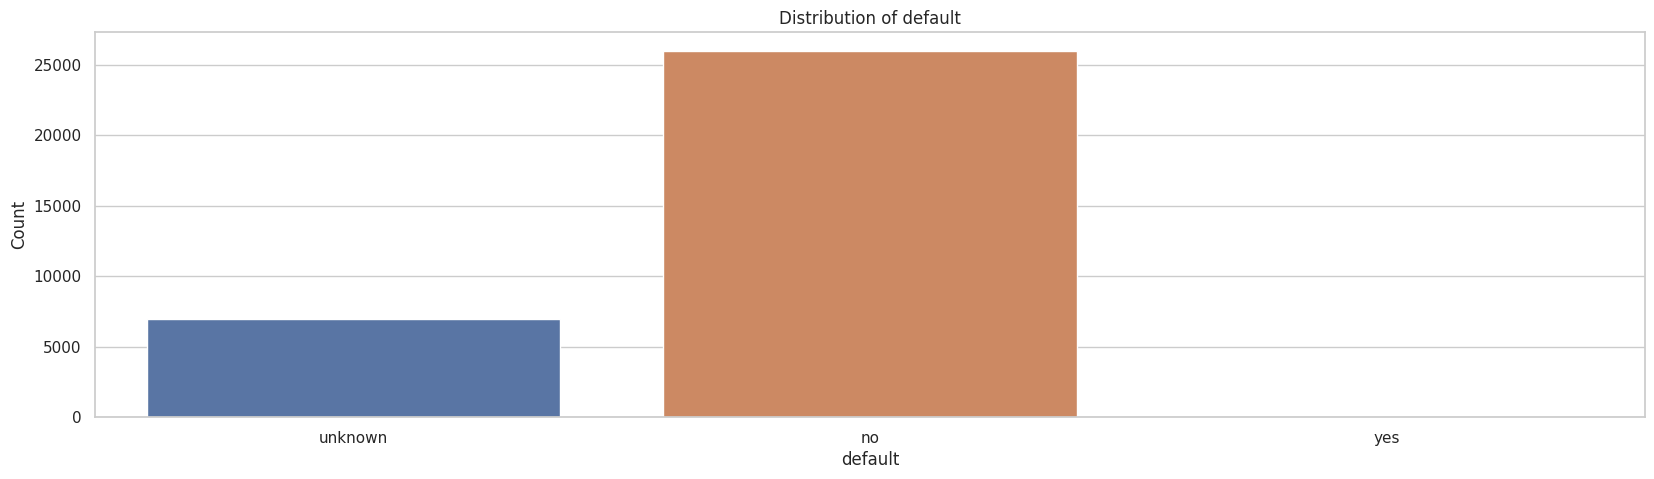

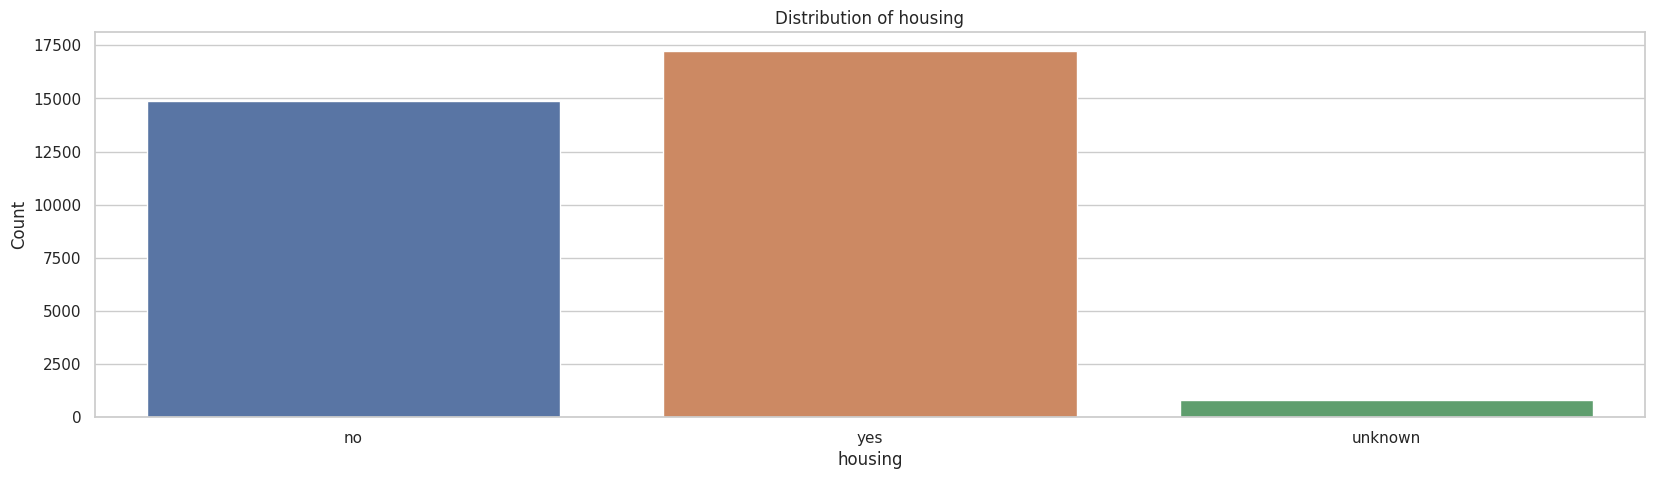

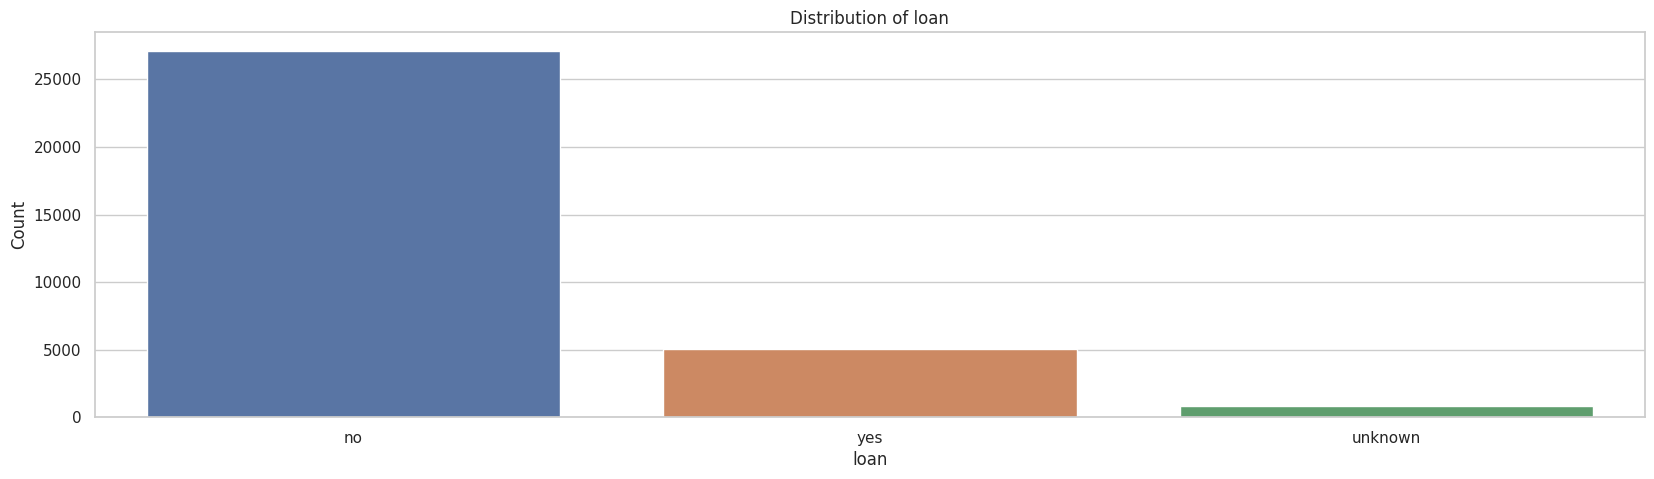

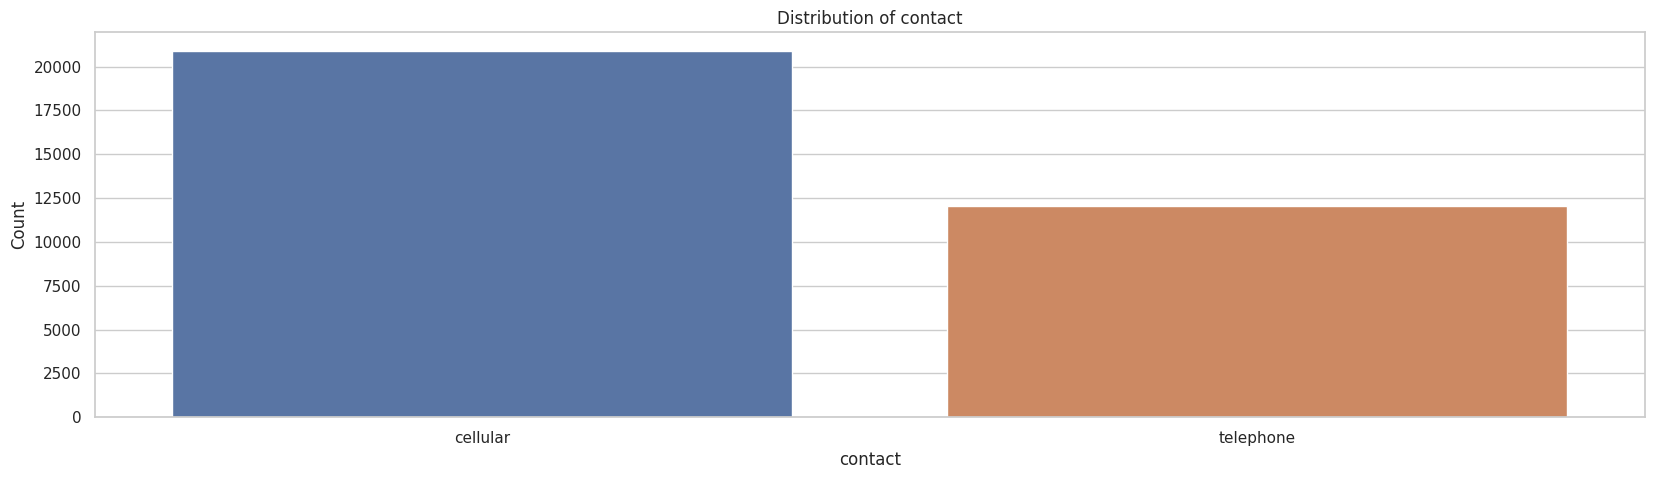

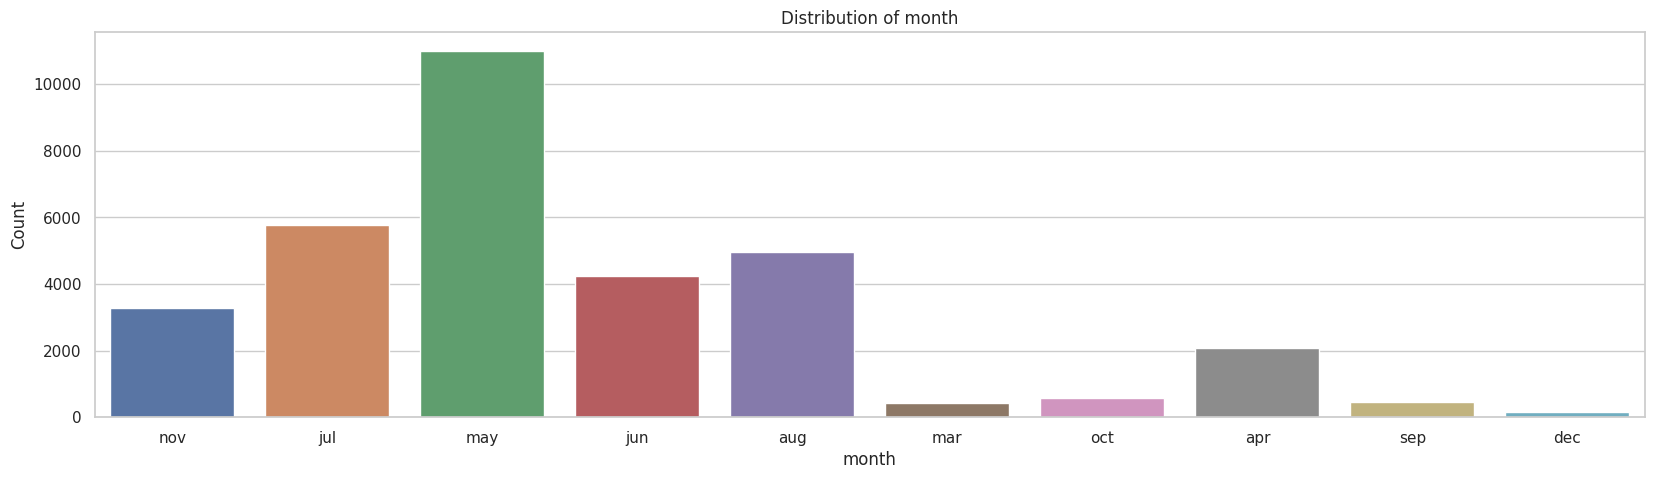

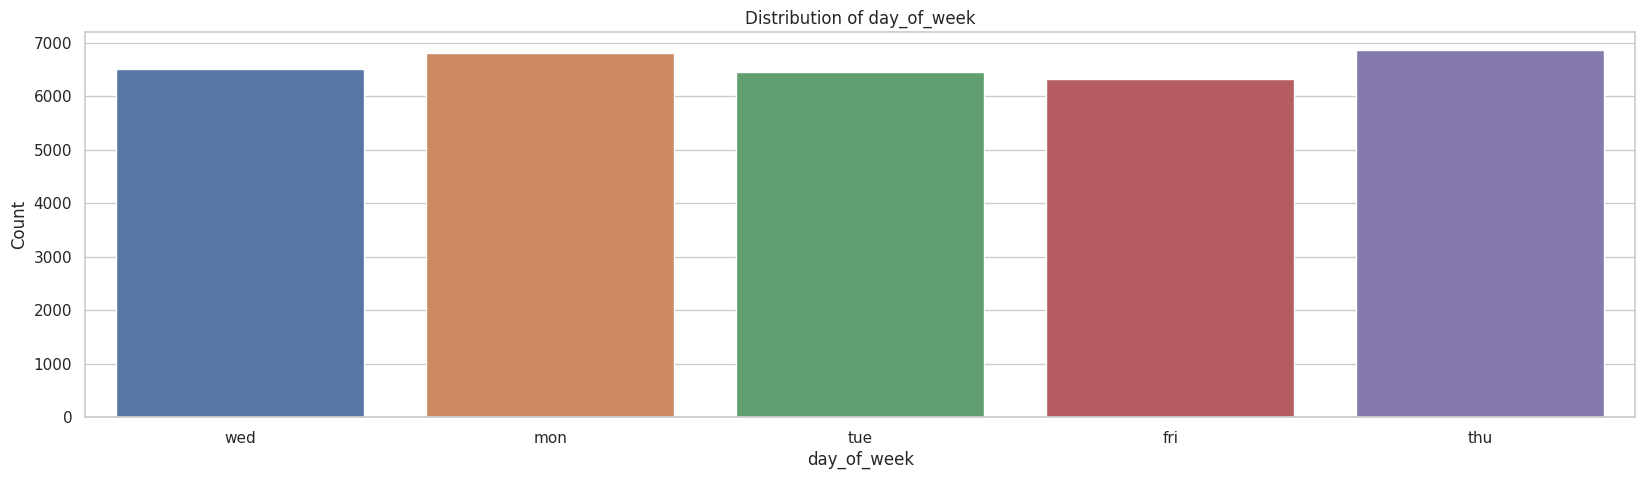

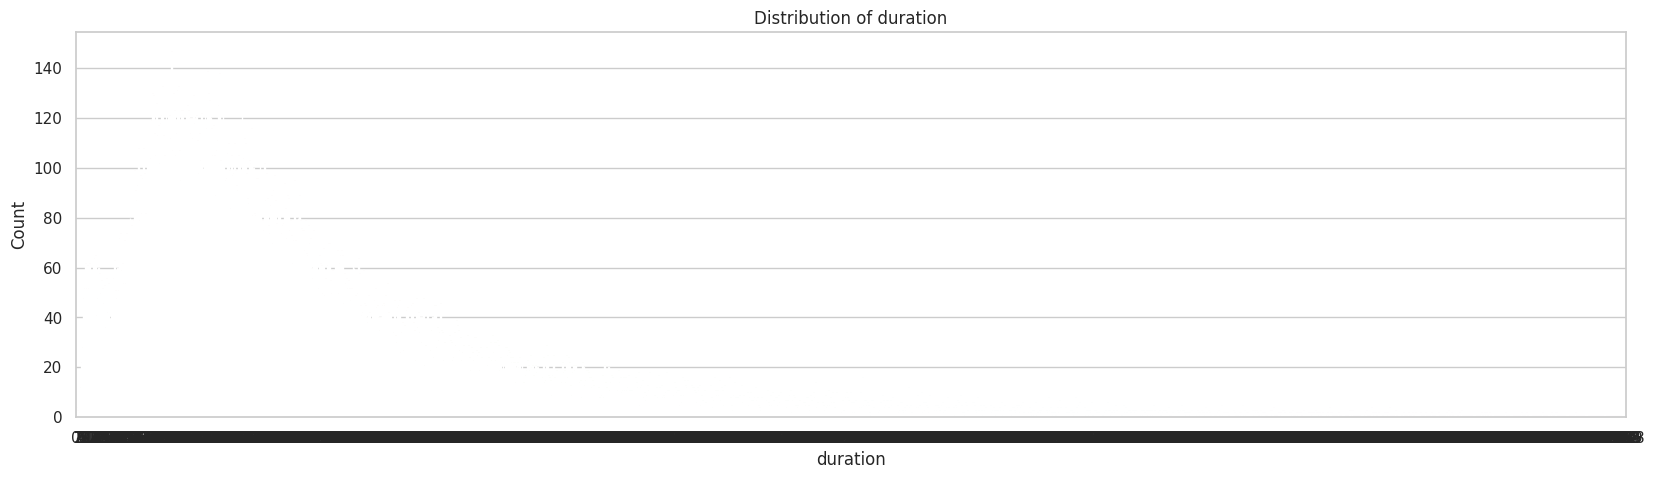

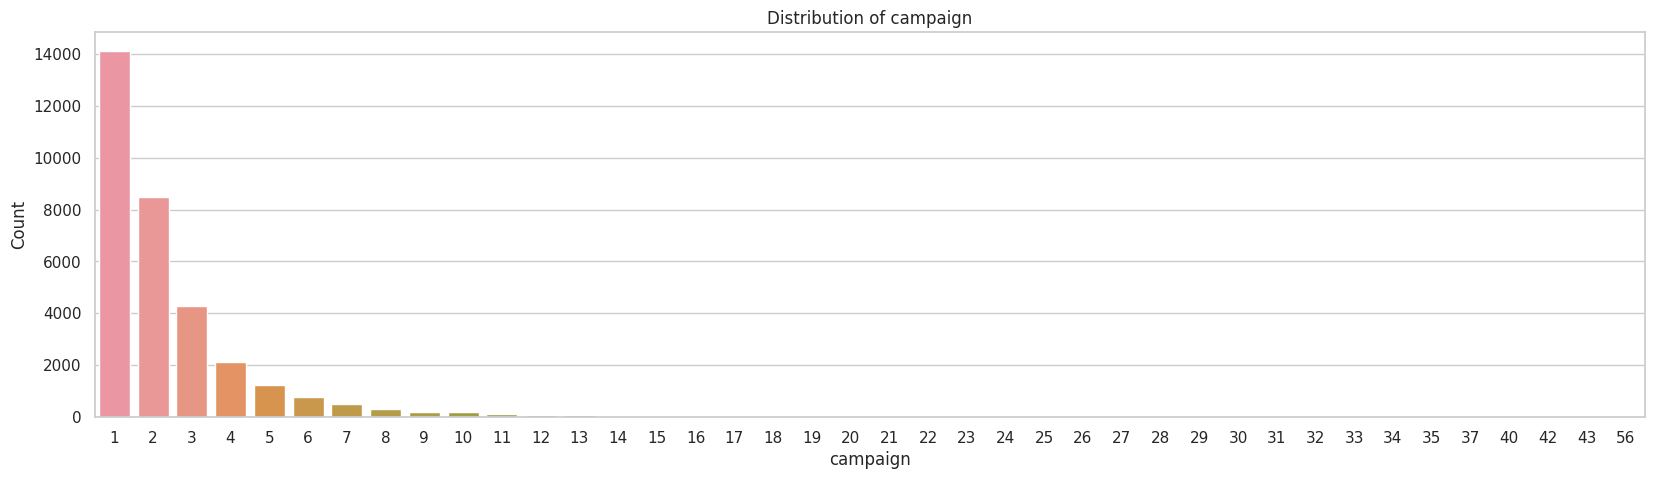

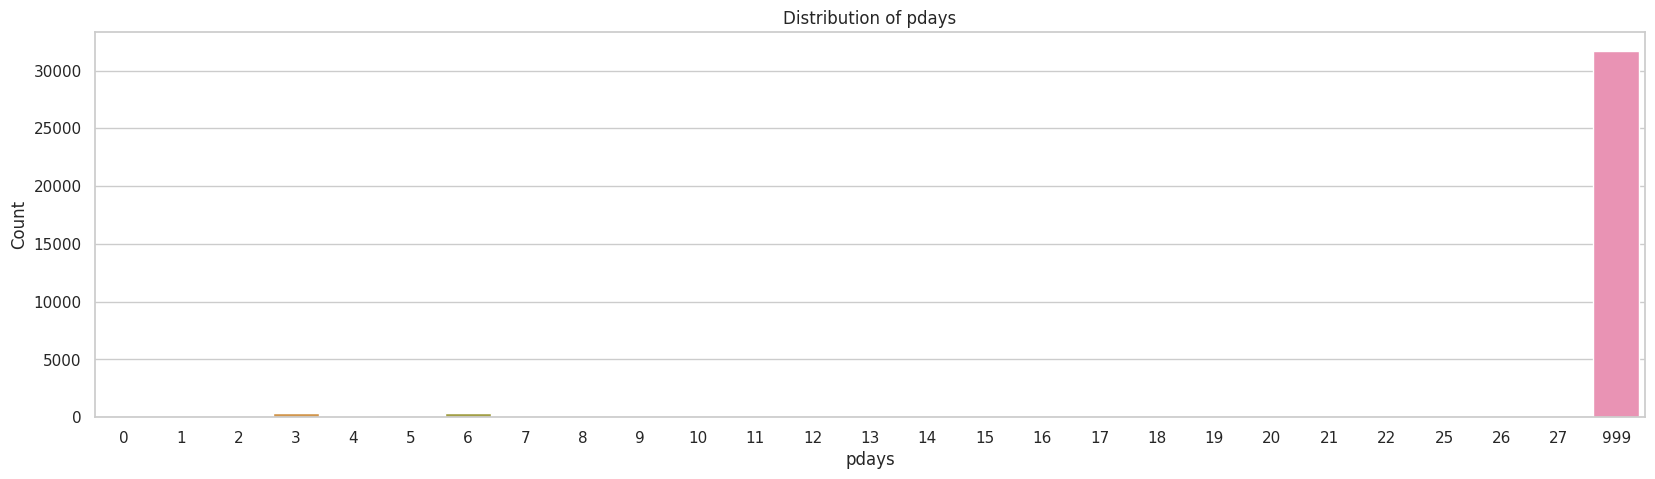

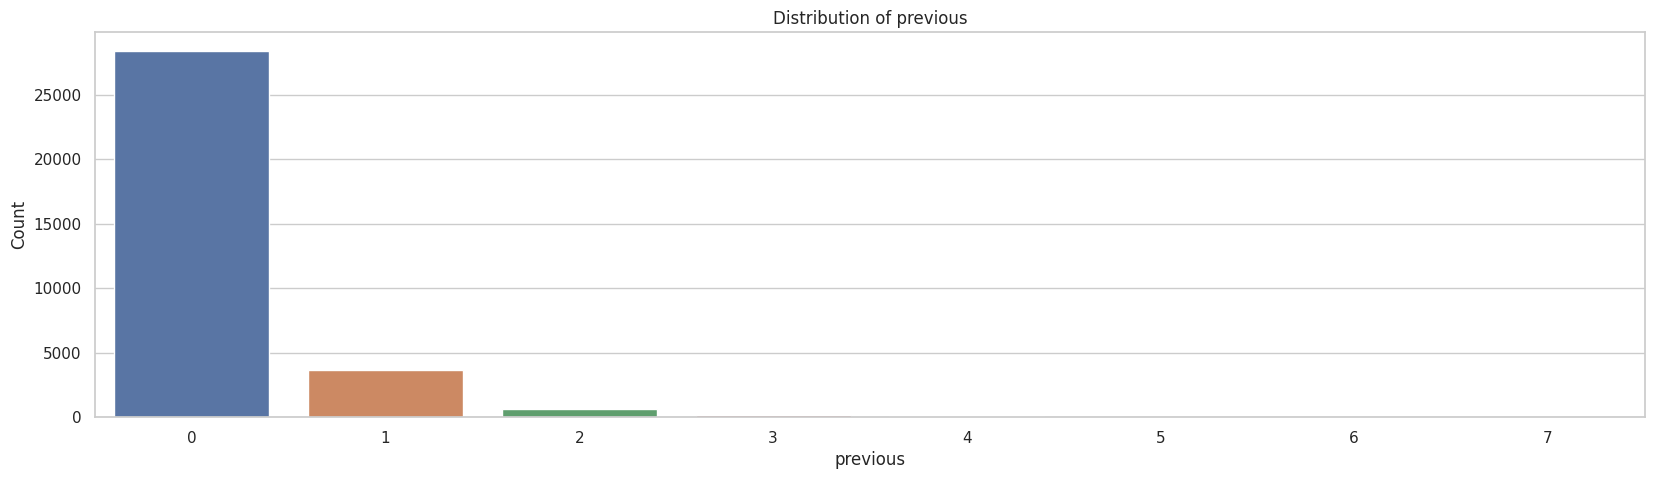

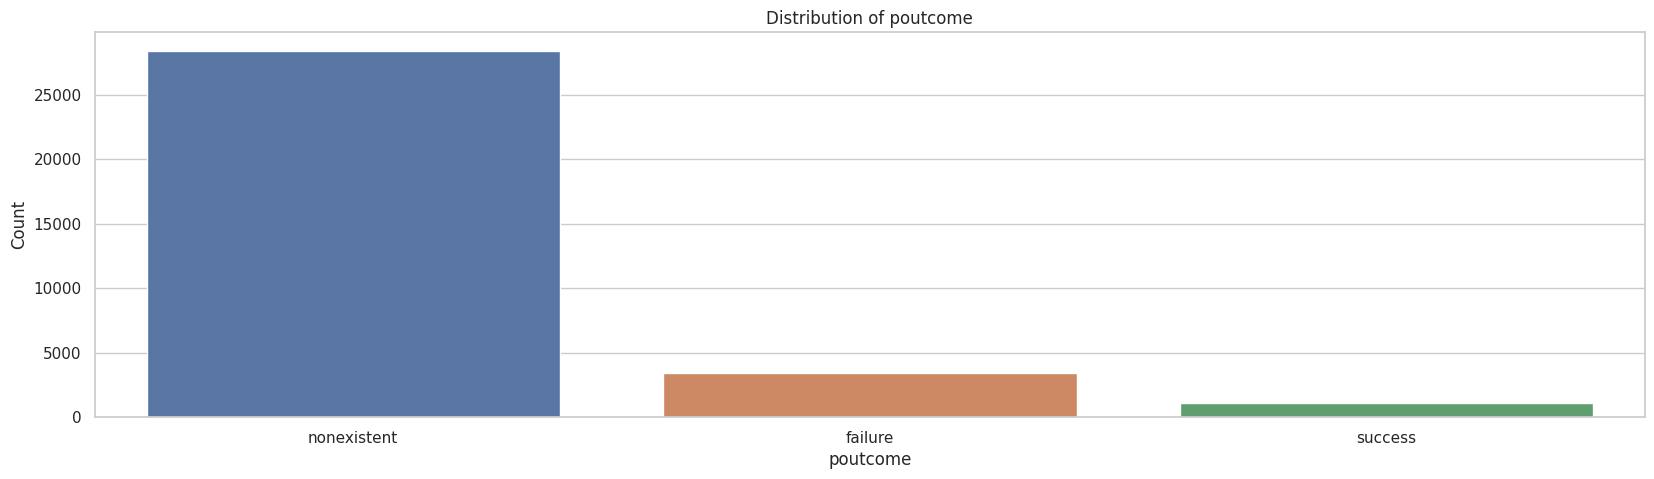

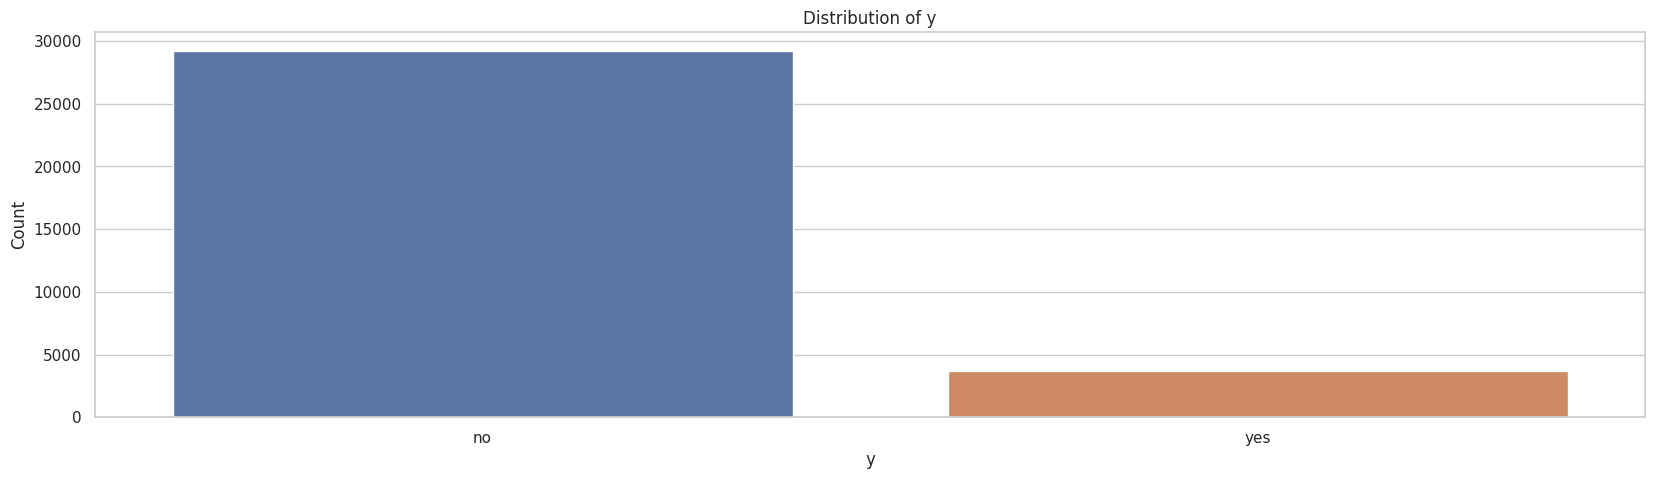

In [ ]:
columns_to_plot = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'y']
for column in columns_to_plot:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=column, data=df)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

# plt.figure(figsize=(20,5))
# sns.countplot(x='age',data=df)
# plt.xlabel('Sepal Length')
# plt.ylabel('Count')
# plt.title('Distribution of Sepal Length')
# plt.show()

In [ ]:
# plt.figure(figsize=(20,5))
# sns.countplot(x='SepalWidthCm',data=df)
# plt.xlabel('Sepal Length')
# plt.ylabel('Count')
# plt.title('Distribution of Sepal Length')
# plt.show()

In [ ]:
# plt.figure(figsize=(20,5))
# sns.countplot(x='PetalLengthCm',data=df)
# plt.xlabel('Sepal Length')
# plt.ylabel('Count')
# plt.title('Distribution of Sepal Length')
# plt.show()

In [ ]:
# plt.figure(figsize=(20,5))
# sns.countplot(x='PetalWidthCm',data=df)
# plt.xlabel('Sepal Length')
# plt.ylabel('Count')
# plt.title('Distribution of Sepal Length')
# plt.show()

In [ ]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


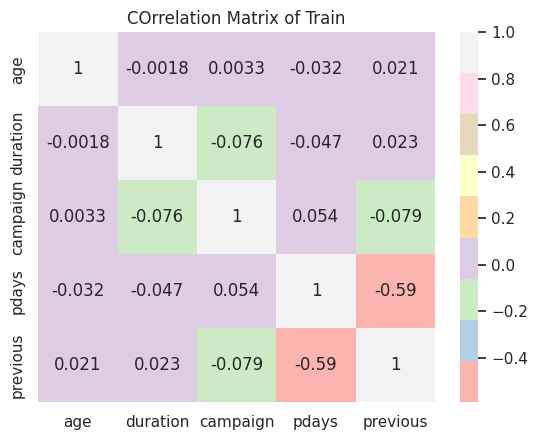

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='Pastel1')
plt.title('COrrelation Matrix of Train')
plt.show()

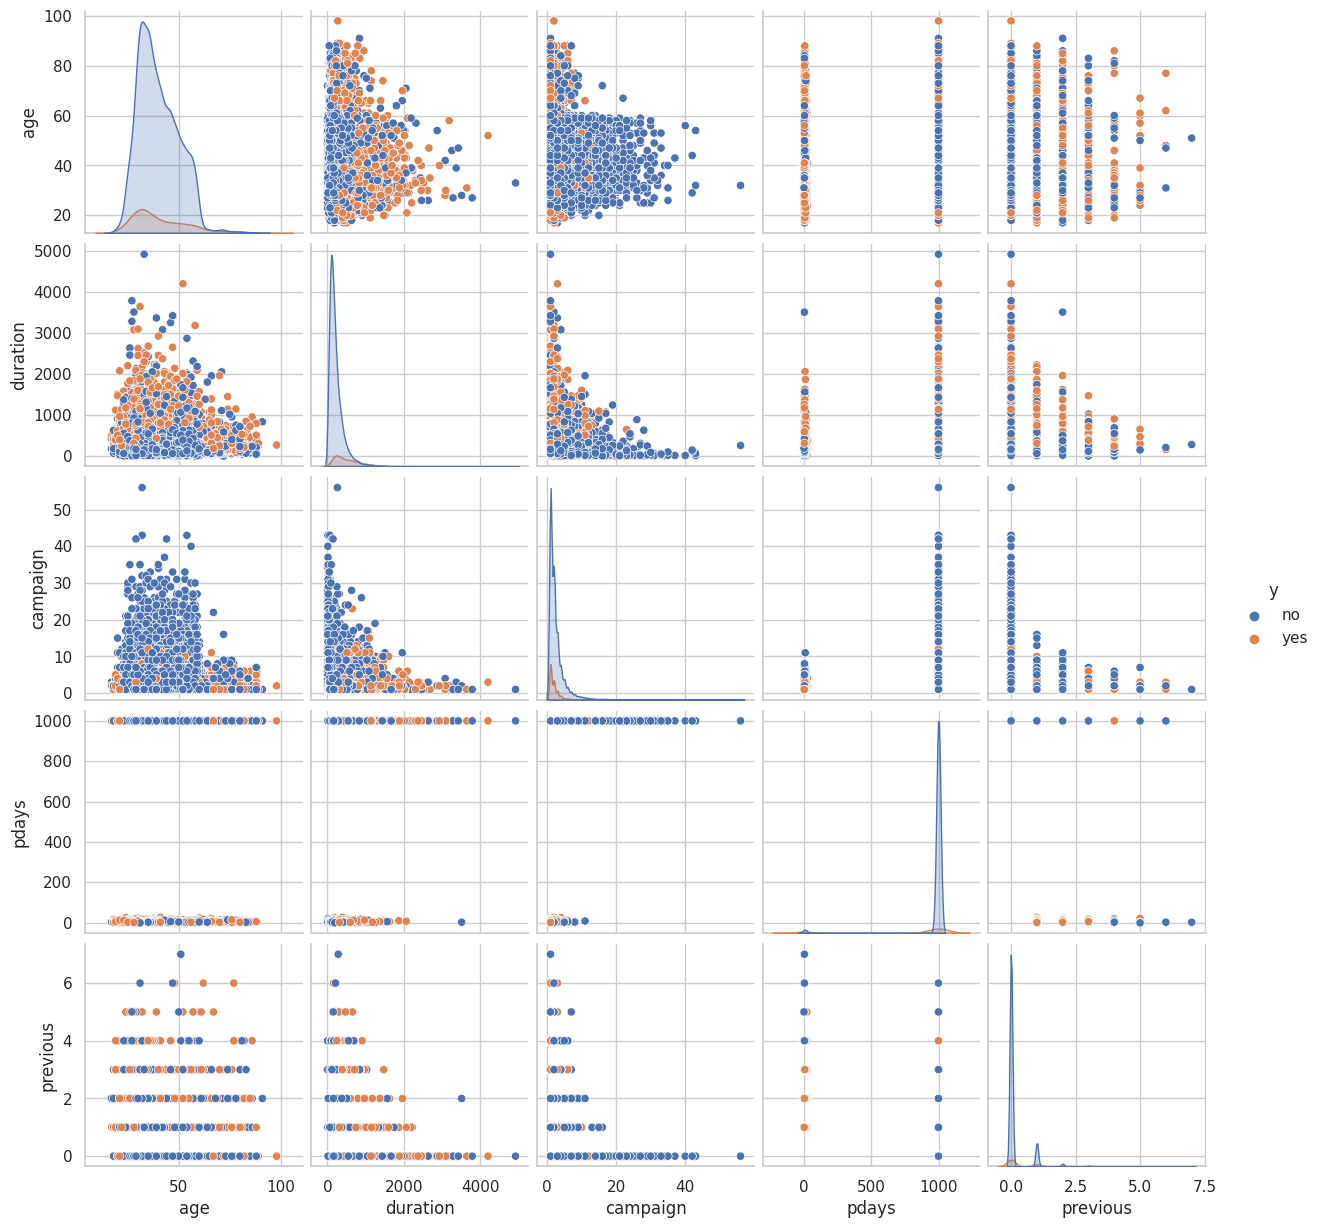

In [ ]:
sns.pairplot(df,hue='y',size=2.5)

In [ ]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df['y']

0         no
1         no
2        yes
3         no
4         no
        ... 
32945     no
32946     no
32947     no
32948     no
32949     no
Name: y, Length: 32950, dtype: object

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()


# df['y']=le.fit_transform(df['y'])
# df['y']



from sklearn.preprocessing import LabelEncoder

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

le = LabelEncoder()

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

df['y'] = le.fit_transform(df['y'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


In [ ]:

x=df.drop(columns=['y'])
y=df[['y']]

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_test.shape

(8238, 15)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
accuracy=score*100
print(accuracy)

90.16751638747269


In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
print(cm)

Confusion Matrix
[[7123  203]
 [ 607  305]]


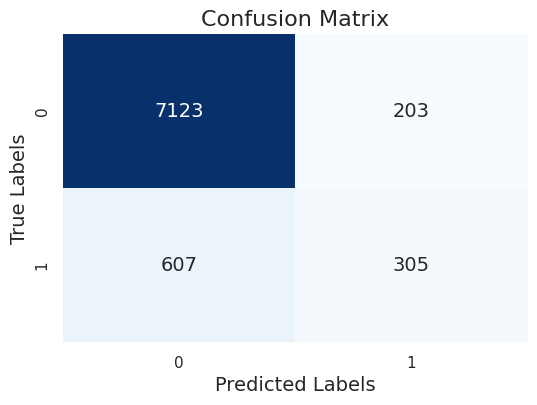

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted Labels',fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5739458075046513, 0.9838709677419355, 'x[10] <= 521.5\ngini = 0.201\nsamples = 24712\nvalue = [21912, 2800]'),
 Text(0.2947395787049049, 0.9516129032258065, 'x[12] <= 513.0\ngini = 0.134\nsamples = 22008\nvalue = [20423, 1585]'),
 Text(0.032140381419017386, 0.9193548387096774, 'x[10] <= 164.5\ngini = 0.477\nsamples = 780\nvalue = [307, 473]'),
 Text(0.013942826533907852, 0.8870967741935484, 'x[3] <= 5.5\ngini = 0.395\nsamples = 225\nvalue = [164, 61]'),
 Text(0.00948427296430794, 0.8548387096774194, 'x[0] <= 71.5\ngini = 0.276\nsamples = 115\nvalue = [96, 19]'),
 Text(0.006364860926213301, 0.8225806451612904, 'x[12] <= 3.5\ngini = 0.231\nsamples = 105\nvalue = [91, 14]'),
 Text(0.00415921605079285, 0.7903225806451613, 'x[8] <= 7.5\ngini = 0.355\nsamples = 39\nvalue = [30, 9]'),
 Text(0.002772810700528567, 0.7580645161290323, 'x[9] <= 0.5\ngini = 0.291\nsamples = 34\nvalue = [28, 6]'),
 Text(0.0015124422002883093, 0.7258064516129032, 'x[1] <= 7.0\ngini = 0.5\nsamples = 6\nvalue 

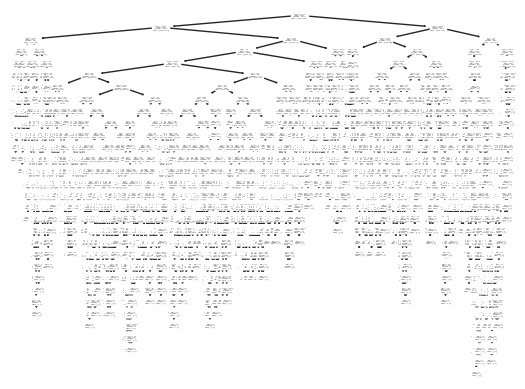

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
y_pred=clf.predict(x_test)
score=accuracy_score(y_test, y_pred)
accuracy=score*100
print(accuracy)

87.04782714251031


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x_test)
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
print(cm)

Confusion Matrix
[[6757  569]
 [ 498  414]]


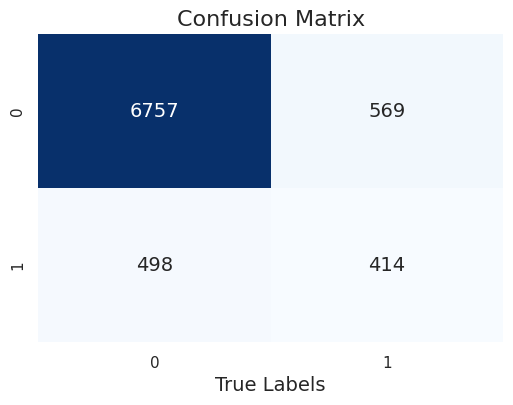

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', cbar=False,annot_kws={'size':14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.xlabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=clf.predict(x_test)
score=accuracy_score(y_test, y_pred)
accuracy=score*100
print(accuracy)

87.04782714251031


In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
accuracy=score*100
print(accuracy)

90.24034959941733


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(x_test)
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
print(cm)

Confusion Matrix
[[7152  174]
 [ 630  282]]


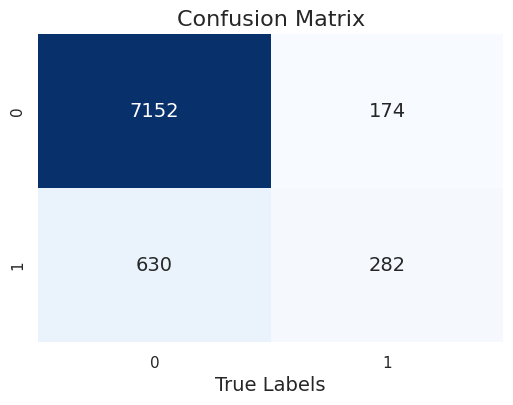

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', cbar=False,annot_kws={'size':14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.xlabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred=classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
accuracy=score*100
print(accuracy)

90.05826656955573


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(x_test)
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
print(cm)

Confusion Matrix
[[7102  224]
 [ 595  317]]


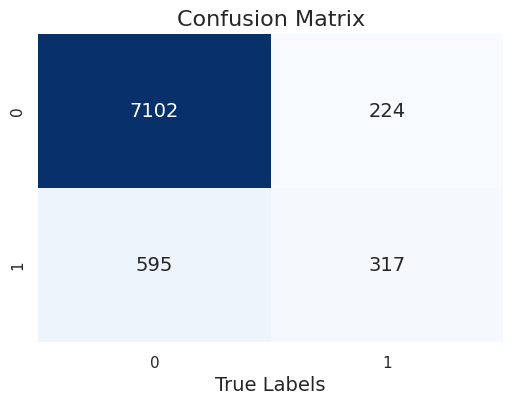

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', cbar=False,annot_kws={'size':14})
plt.xlabel('Predicted Labels', fontsize=14)
plt.xlabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=42)
x_re,y_re=sm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.25)




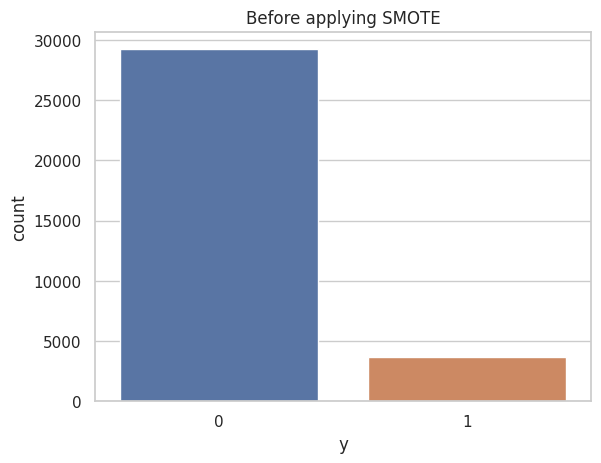

In [ ]:
sns.countplot(x ='y', data = y)
plt.title('Before applying SMOTE')
plt.show()

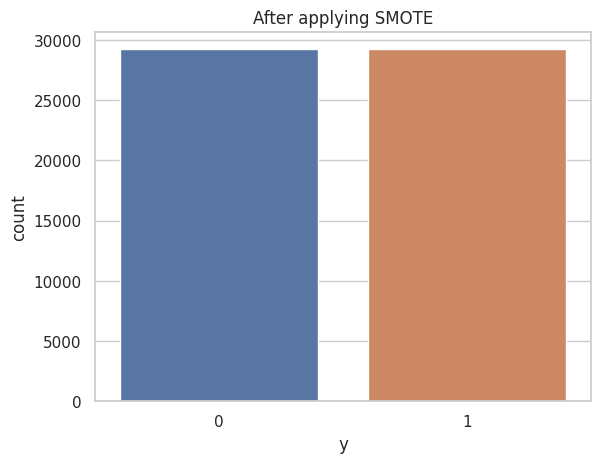

In [ ]:
sns.countplot(x ='y', data = y_re)
plt.title('After applying SMOTE')
plt.show()

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                   Logistic Regression: 82.43%
                  Gaussian Naive Bayes: 80.74%
                   K-Nearest Neighbors: 89.48%
                Support Vector Machine: 78.66%
                          RandomForest: 93.84%


Confusion Matrix
[[6196 1091]
 [1477 5855]]


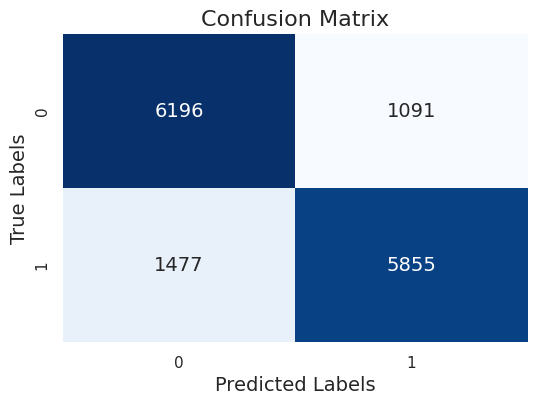

Confusion Matrix
[[5976 1311]
 [1504 5828]]


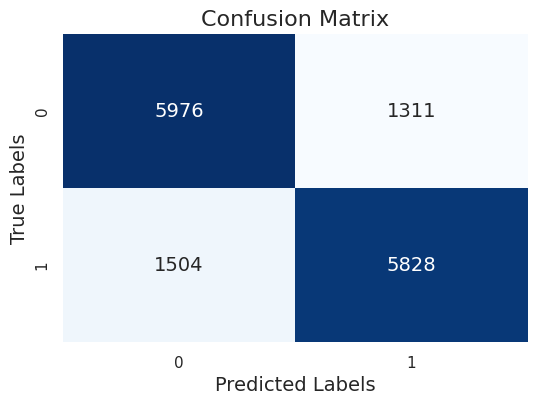

Confusion Matrix
[[5834 1453]
 [  85 7247]]


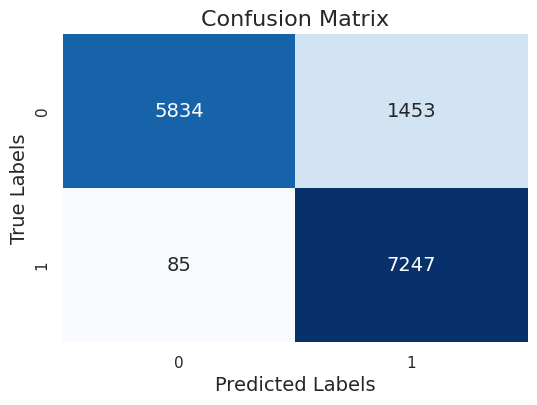

Confusion Matrix
[[6268 1019]
 [2100 5232]]


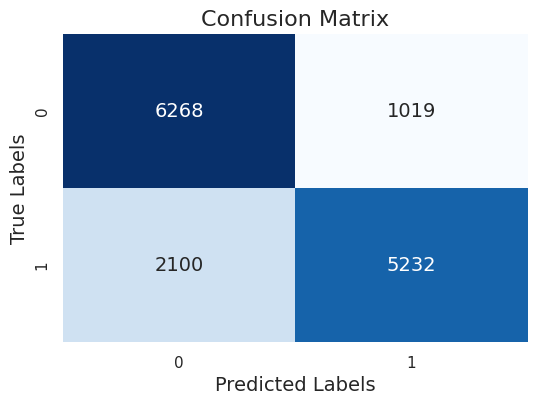

Confusion Matrix
[[6731  556]
 [ 345 6987]]


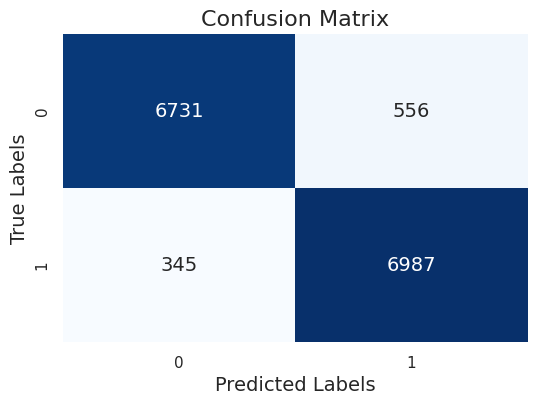

In [ ]:
for name, model in models.items():
  y_pred = model.predict(x_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title('Confusion Matrix', fontsize = 16)
  plt.show()